## Roadmap penelitian

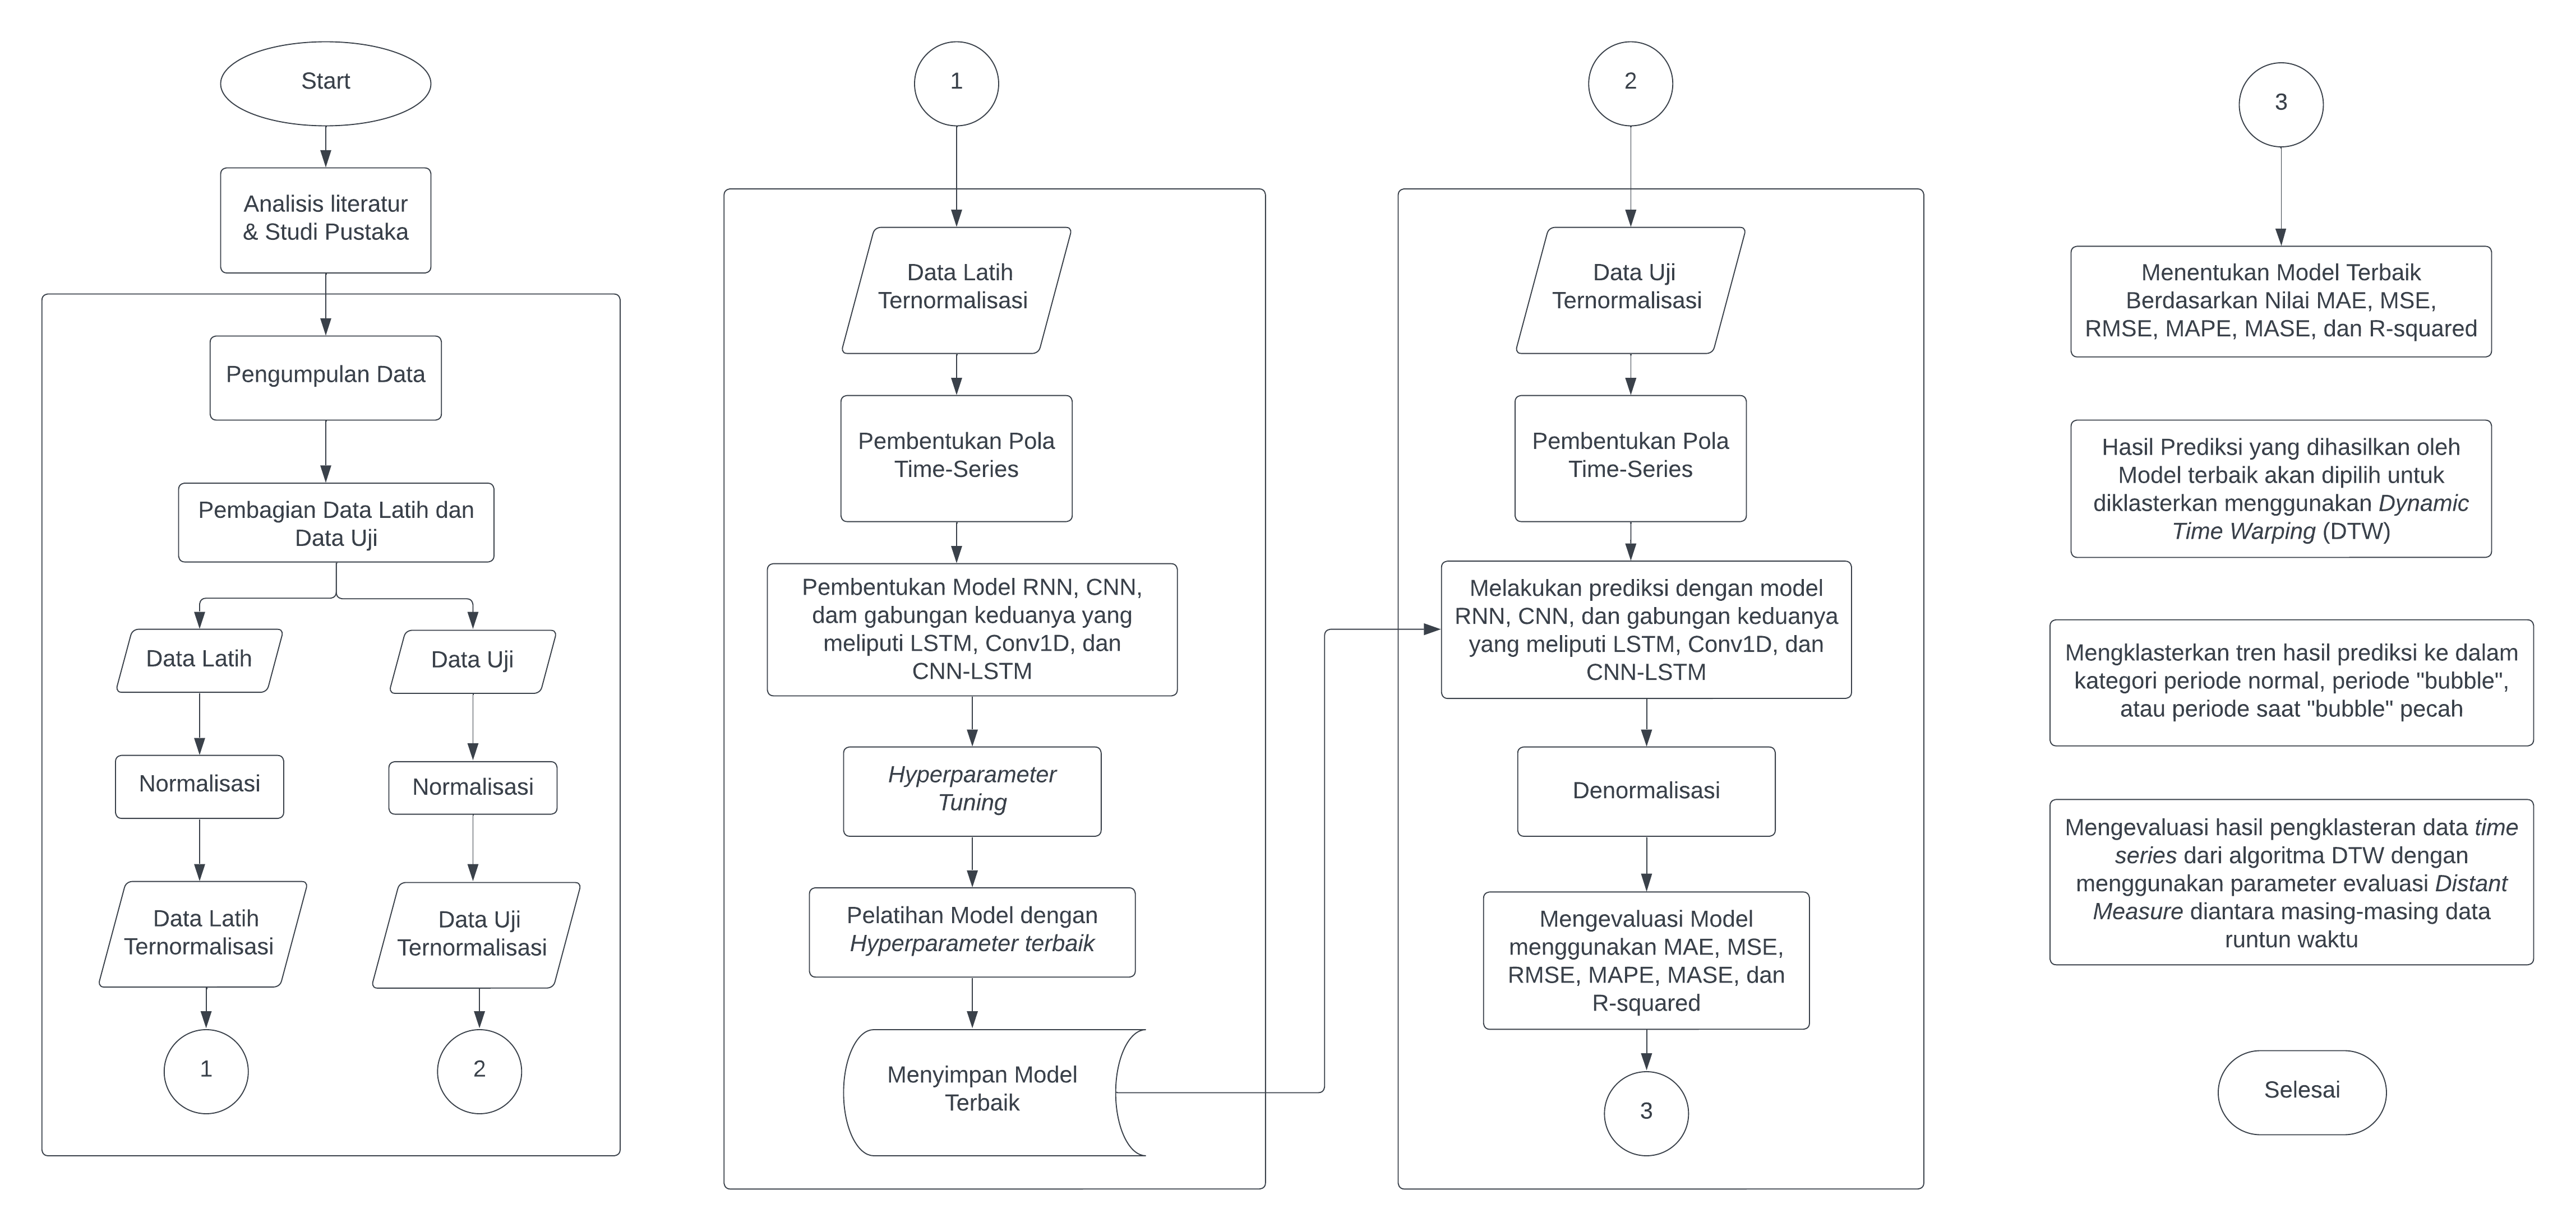

# Menghubungkan ke Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get Data

Sumber data: https://indexes.nikkei.co.jp/en/nkave/archives/data?list=daily


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [2]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv


--2024-06-21 02:05:38--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 886390 (866K) [text/plain]
Saving to: ‘Nikkei225_daily.csv’

Nikkei225_daily.csv 100%[===================>] 865.62K  --.-KB/s    in 0.06s   

2024-06-21 02:05:38 (13.9 MB/s) - ‘Nikkei225_daily.csv’ saved [886390/886390]



## Import data time series dengan pandas

In [3]:
# import dengan pandas
import pandas as pd

# konversi format nilai
def convert_value(value):
    # jika value bukan '-' merubah format desimal (contoh : 30,056 -> 30056)
    if value != '-':
        return float(value.replace(',', ''))
    else:
        return None

# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/Nikkei225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"],
                           converters = {'Open': convert_value,
                                         'High': convert_value,
                                         'Low': convert_value,
                                         'Close': convert_value})
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

,Open,High,Low,Close
Date,,,,
2024-02-22,38508.07,39156.97,38508.07,39098.68
2024-02-26,39320.64,39388.08,39181.03,39233.71
2024-02-27,39260.78,39426.29,39113.03,39239.52
2024-02-28,39189.22,39283.95,39075.47,39208.03
2024-02-29,38935.53,39250.12,38876.81,39166.19


In [4]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20078 entries, 1950-01-04 to 2024-02-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9685 non-null   float64
 1   High    9685 non-null   float64
 2   Low     9685 non-null   float64
 3   Close   20078 non-null  float64
dtypes: float64(4)
memory usage: 784.3 KB


data saham hanya digunakan saat harga close

In [5]:
nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()


,Closing Price (Yen)
Date,
2024-02-22,39098.68
2024-02-26,39233.71
2024-02-27,39239.52
2024-02-28,39208.03
2024-02-29,39166.19


Informasi jumlah data

In [6]:
len(nikkei225_df)

20078

menampilkan missing data

In [7]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

Empty DataFrame
Columns: [Closing Price (Yen)]
Index: []


In [8]:

nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [9]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv

--2024-06-21 02:05:39--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11737 (11K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]  11.46K  --.-KB/s    in 0s      

2024-06-21 02:05:39 (77.2 MB/s) - ‘discountRate.csv’ saved [11737/11737]



# Import data time seres tambahan: discount rate

import data discount rate

In [10]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[-3:]

<ipython-input-10-17f456e02e56>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  discRate_df = pd.read_csv("/content/discountRate.csv",


,discountRate
Date,
2023-12-01,0.3
2024-01-01,0.3
2024-02-01,0.3


In [11]:
len(discRate_df)

890

menampilkan missing data

In [12]:
print(discRate_df.isnull().sum())

discountRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [13]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [14]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1950, 1, 1, 0, 0),
  datetime.datetime(1950, 2, 1, 0, 0),
  datetime.datetime(1950, 3, 1, 0, 0)],
 [5.11, 5.11, 5.11])

In [15]:
len(discountRate_value)

890

In [16]:
type(timesteps_discountRate), type(discountRate_value)

(list, list)

In [17]:
len(discountRate_value)

890

# Mengumpulkan data menjadi satu dataframe

In [18]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate

nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

,Closing Price (Yen),discount_rate
Date,,
1950-01-04,108.56,None
1950-01-05,105.54,None
1950-01-06,102.64,None
1950-01-07,102.95,None
1950-01-09,102.78,None
...,...,...
2024-02-22,39098.68,None
2024-02-26,39233.71,None
2024-02-27,39239.52,None


menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [19]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [20]:
discRate_df[80:90]

,discountRate
Date,
1956-09-01,7.30
1956-10-01,7.30
1956-11-01,7.30
1956-12-01,7.30
1957-01-01,7.30
1957-02-01,7.30
1957-03-01,7.67
1957-04-01,7.67
1957-05-01,8.40


In [21]:
nikkei225_close_multivariate_df[11520:11600]

,Closing Price (Yen),discount_rate
Date,,
1989-04-26,33434.93,2.5
1989-04-27,33500.83,2.5
1989-04-28,33713.35,2.5
1989-05-01,33793.17,3.25
1989-05-02,33954.99,3.25
...,...,...
1989-08-14,34671.62,3.25
1989-08-15,34810.69,3.25
1989-08-16,35084.15,3.25


In [22]:
nikkei225_close_multivariate_df.index.tolist()

[Timestamp('1950-01-04 00:00:00'),
 Timestamp('1950-01-05 00:00:00'),
 Timestamp('1950-01-06 00:00:00'),
 Timestamp('1950-01-07 00:00:00'),
 Timestamp('1950-01-09 00:00:00'),
 Timestamp('1950-01-10 00:00:00'),
 Timestamp('1950-01-11 00:00:00'),
 Timestamp('1950-01-12 00:00:00'),
 Timestamp('1950-01-13 00:00:00'),
 Timestamp('1950-01-14 00:00:00'),
 Timestamp('1950-01-16 00:00:00'),
 Timestamp('1950-01-17 00:00:00'),
 Timestamp('1950-01-18 00:00:00'),
 Timestamp('1950-01-19 00:00:00'),
 Timestamp('1950-01-20 00:00:00'),
 Timestamp('1950-01-21 00:00:00'),
 Timestamp('1950-01-23 00:00:00'),
 Timestamp('1950-01-24 00:00:00'),
 Timestamp('1950-01-25 00:00:00'),
 Timestamp('1950-01-26 00:00:00'),
 Timestamp('1950-01-27 00:00:00'),
 Timestamp('1950-01-28 00:00:00'),
 Timestamp('1950-01-30 00:00:00'),
 Timestamp('1950-01-31 00:00:00'),
 Timestamp('1950-02-01 00:00:00'),
 Timestamp('1950-02-02 00:00:00'),
 Timestamp('1950-02-03 00:00:00'),
 Timestamp('1950-02-04 00:00:00'),
 Timestamp('1950-02-

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [23]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Memvisualisasikan timesteps (serangkaian keterangan waktu dengan interval tertentu) terhadap nilainya pada timesteps yang bersesuaian
  Parameters
  -------------
  timesteps : kumpulan timestep
  values : kumpulan nilai (saham dan discount Rate)
  format : style grafik, default "."
  start : timesteps rentang awal yang divisualisasi
  end : timesteps rentang akhir yang divisualisasi
  label : untuk memberi keterangan grafik
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Tanggal")
  plt.ylabel("Saham Nikkei225 Penutupan (harian)")

  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)


In [24]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_DirRec_direct_result(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Memvisualisasikan timesteps (serangkaian keterangan waktu dengan interval tertentu) terhadap nilainya pada timesteps yang bersesuaian
  Parameters
  -------------
  timesteps : kumpulan timestep
  values : kumpulan nilai (saham dan discount Rate)
  format : style grafik, default "."
  start : timesteps rentang awal yang divisualisasi
  end : timesteps rentang akhir yang divisualisasi
  label : untuk memberi keterangan grafik
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Tanggal")
  plt.ylabel("Saham Nikkei225 Penutupan (harian)")

  # Menghitung batas minimum dan maksimum nilai
  nilai_minimum = min(values)
  nilai_maksimum = max(values)

  # Menyesuaikan batas sumbu Y
  plt.ylim(0, int(nilai_maksimum+2000))

  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)


Visualisasi data saham nikkei225

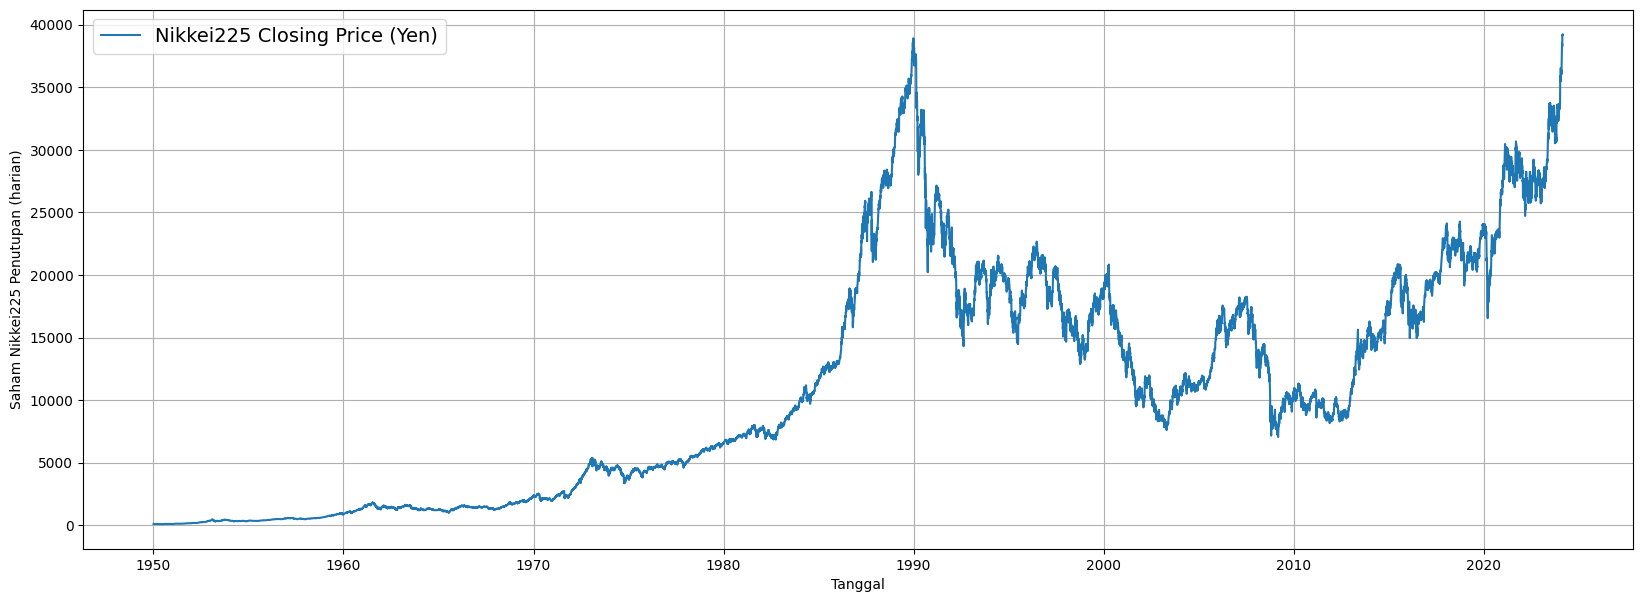

In [25]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

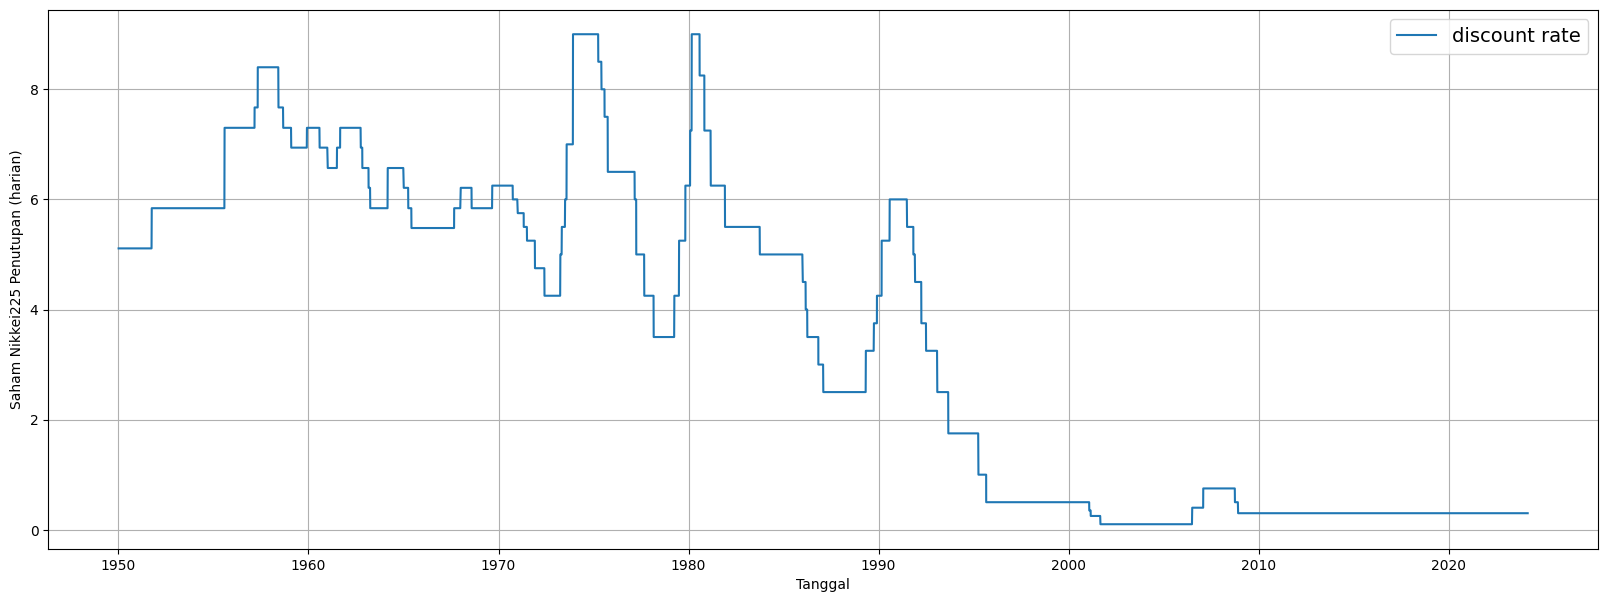

In [26]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


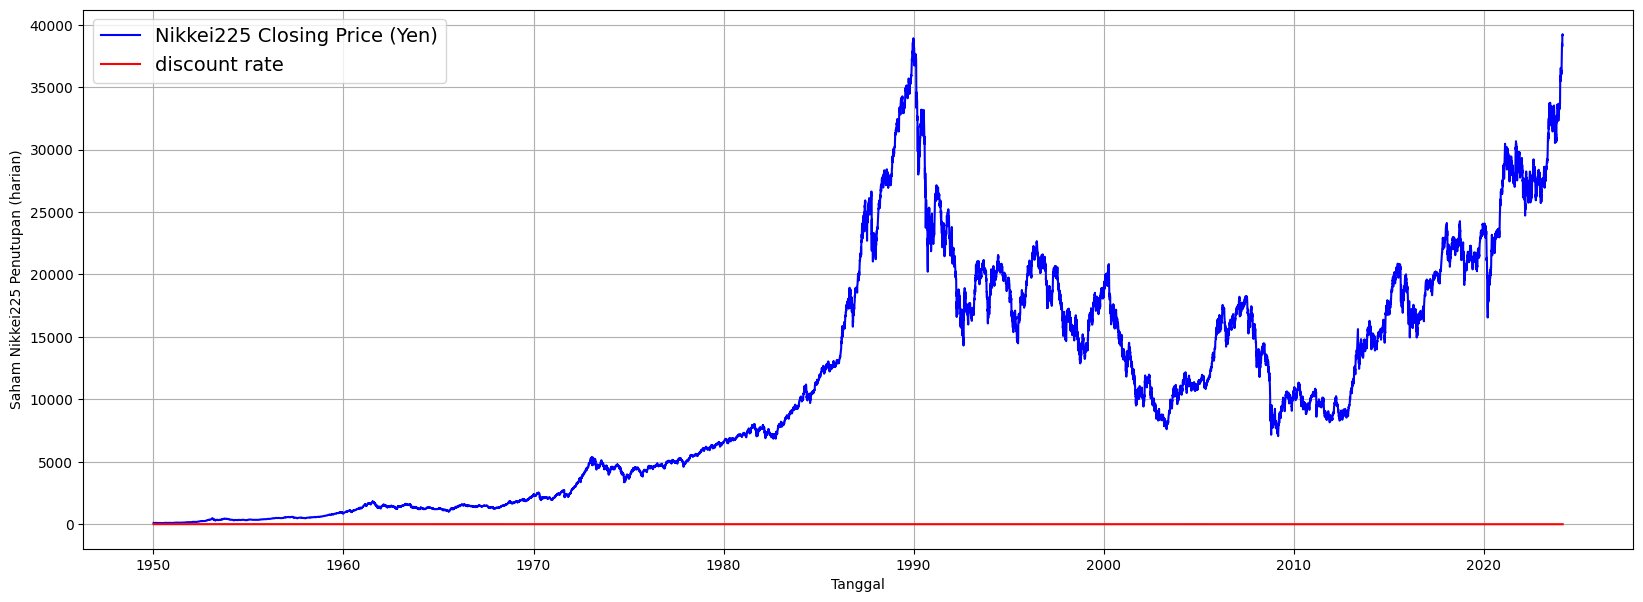

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# menghitung korelasi antar variabel data time series

## Korelasi antara variabel harga saham Nikkei 225 dan discount rate dihitung setelah kedua variabel di normalisasi



Melakukan normalisasi dataset

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler_multivariate = MinMaxScaler(feature_range=(0, 1))
scaler_multivariate.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [ ]:
scaler_univariate = MinMaxScaler(feature_range = (0,1))

# mengimplementasikan scaler khusus univariate ke data saham nikkei225 saja
scaler_univariate.fit(nikkei225_close_df["Closing Price (Yen)"].values.reshape(-1, 1))

MinMaxScaler()

In [ ]:
# Melakukan normalization
scaler_multivariate.transform(nikkei225_close_multivariate_df)

array([[5.95337367e-04, 5.62921348e-01],
       [5.18206571e-04, 5.62921348e-01],
       [4.44140575e-04, 5.62921348e-01],
       ...,
       [1.00000000e+00, 2.24719101e-02],
       [9.99195745e-01, 2.24719101e-02],
       [9.98127152e-01, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [ ]:
normalized_data  = scaler_multivariate.transform(nikkei225_close_multivariate_df)
normalized_data


array([[5.95337367e-04, 5.62921348e-01],
       [5.18206571e-04, 5.62921348e-01],
       [4.44140575e-04, 5.62921348e-01],
       ...,
       [1.00000000e+00, 2.24719101e-02],
       [9.99195745e-01, 2.24719101e-02],
       [9.98127152e-01, 2.24719101e-02]])

In [ ]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (20078, 2)


In [ ]:
normalized_data[:,0].reshape(-1, 1)

array([[5.95337367e-04],
       [5.18206571e-04],
       [4.44140575e-04],
       ...,
       [1.00000000e+00],
       [9.99195745e-01],
       [9.98127152e-01]])

In [ ]:
type(normalized_data[:,1].reshape(-1, 1))

numpy.ndarray

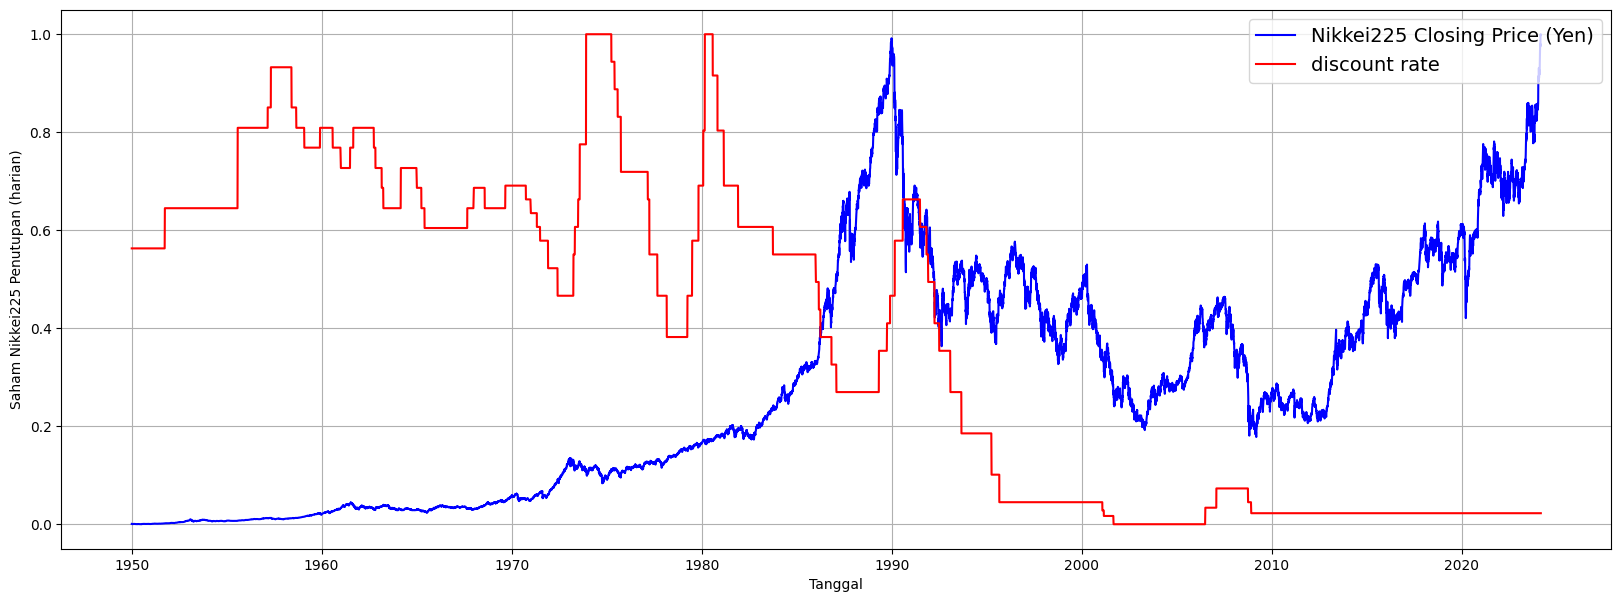

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "discount rate", color = 'r')



In [ ]:
nikkei225_close_multivariate_df.to_numpy()[:, 1]

array([5.11, 5.11, 5.11, ..., 0.3, 0.3, 0.3], dtype=object)

HASIL KOEFISIEN KORELASI PEARSON

In [ ]:
import numpy as np
# menghitung koefisien korelasi dengan korelasi pearson

koefisienKorelasi_pearson = nikkei225_close_multivariate_df.corr(method = "pearson")
print("Correlation coefficient saham dengan discount rate: \n", koefisienKorelasi_pearson)

Correlation coefficient saham dengan discount rate: 
                      Closing Price (Yen)  discount_rate
Closing Price (Yen)             1.000000      -0.674791
discount_rate                  -0.674791       1.000000


# LANJUT MEMBUAT FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [ ]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [ ]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  rmse = tf.sqrt(mse)

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)


  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "R-square" : Rsquare}


# Menganalisis hasil prediksi bulan Maret 2024 dari direct dan DirRec Forecasting

In [ ]:
# import data prediksi DirRec forecasting bulan Maret 2024
DirRec_forecasting_Maret2024_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/RunningKomputer_direct_DirRec_Forecasting/predictedValue_directForecasting/gabung_dataPrediksi/intoFuture_forecasted_value/aktual_VS_directForecasting.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])


In [ ]:
DirRec_forecasting_Maret2024_df

,Closing Price (Yen) (Nilai aktual),Closing Price (Yen) (Nilai Prediksi)
Date,,
2024-03-01,39910.82,39168.111111
2024-03-04,40109.23,39171.004994
2024-03-05,40097.63,38940.458229
2024-03-06,40090.78,39027.221033
2024-03-07,39598.71,39085.273719
2024-03-08,39688.94,39226.068113
2024-03-11,38820.49,38666.085478
2024-03-12,38797.51,38142.129349
2024-03-13,38695.97,38232.243455


visualisasi hasil DirRec Forecasting bulan maret 2024

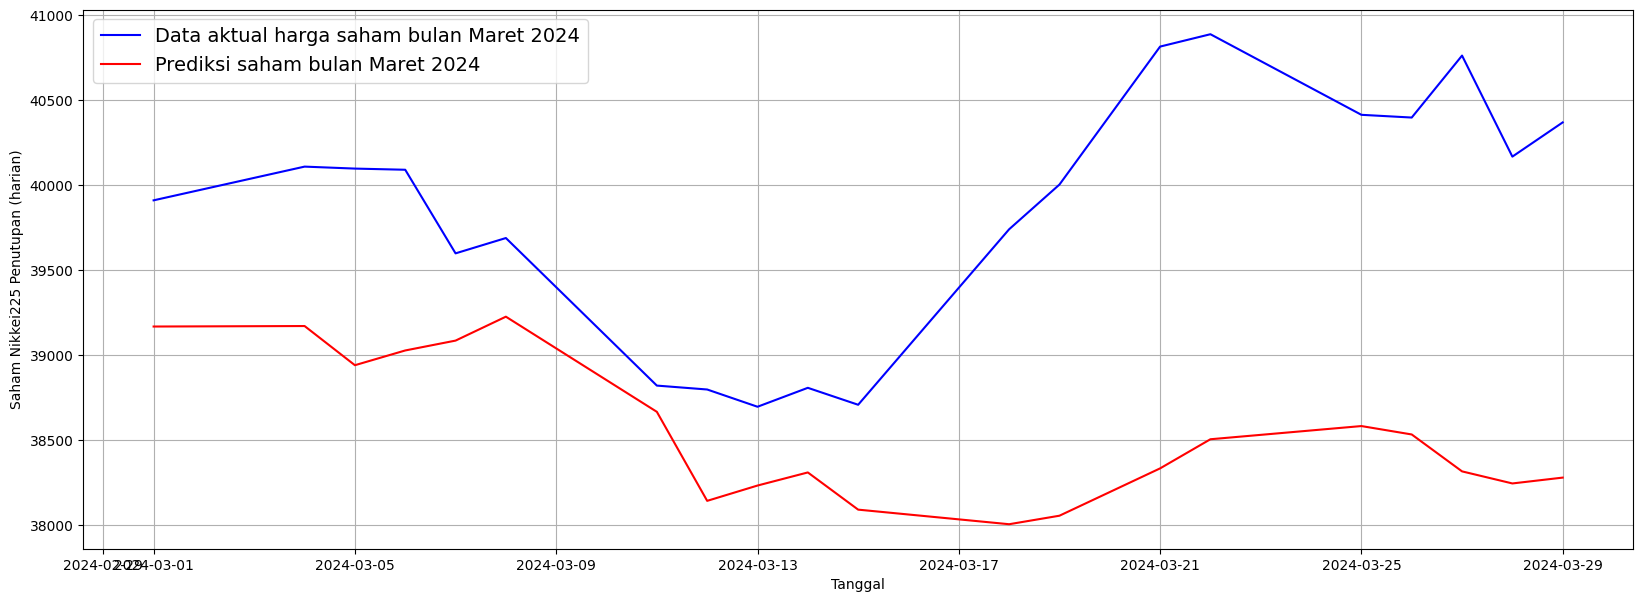

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = DirRec_forecasting_Maret2024_df.index.tolist(), values = DirRec_forecasting_Maret2024_df['Closing Price (Yen) (Nilai aktual)'].tolist(), format = "-", label = "Data aktual harga saham bulan Maret 2024", color = 'b')
plot_time_series(timesteps = DirRec_forecasting_Maret2024_df.index.tolist(), values = DirRec_forecasting_Maret2024_df['Closing Price (Yen) (Nilai Prediksi)'].tolist(), format = "-", label = "Prediksi saham bulan Maret 2024", color = 'r')


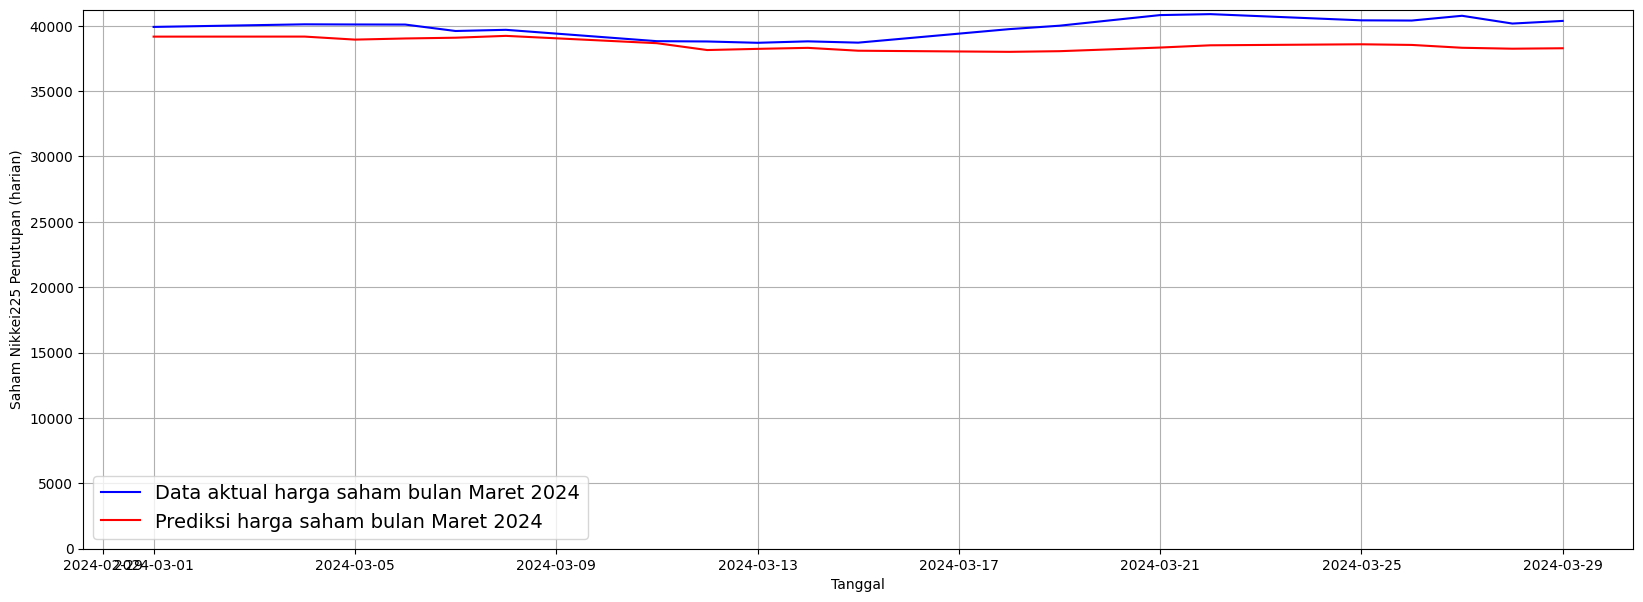

In [ ]:
plt.figure(figsize = (20,7))
plot_DirRec_direct_result(timesteps = DirRec_forecasting_Maret2024_df.index.tolist(), values = DirRec_forecasting_Maret2024_df['Closing Price (Yen) (Nilai aktual)'].tolist(), format = "-", label = "Data aktual harga saham bulan Maret 2024", color = 'b')
plot_DirRec_direct_result(timesteps = DirRec_forecasting_Maret2024_df.index.tolist(), values = DirRec_forecasting_Maret2024_df['Closing Price (Yen) (Nilai Prediksi)'].tolist(), format = "-", label = "Prediksi harga saham bulan Maret 2024", color = 'r')


In [ ]:
# import data prediksi direct forecasting bulan Maret 2024

direct_forecasting_Maret2024_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/RunningKomputer_direct_DirRec_Forecasting/directForecasting_REVISI/gabung_dataAktual/intoFuture_forecasted_value/aktual_VS_directForecasting.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])



In [ ]:
direct_forecasting_Maret2024_df

,Closing Price (Yen) (Nilai aktual),Closing Price (Yen) (Nilai Prediksi)
Date,,
2024-03-01,39910.82,39168.111111
2024-03-04,40109.23,39304.473664
2024-03-05,40097.63,39081.577018
2024-03-06,40090.78,38877.086866
2024-03-07,39598.71,39595.924990
2024-03-08,39688.94,39384.564200
2024-03-11,38820.49,39123.746023
2024-03-12,38797.51,39082.326160
2024-03-13,38695.97,40119.615069


visualisasi hasil direct Forecasting bulan maret 2024

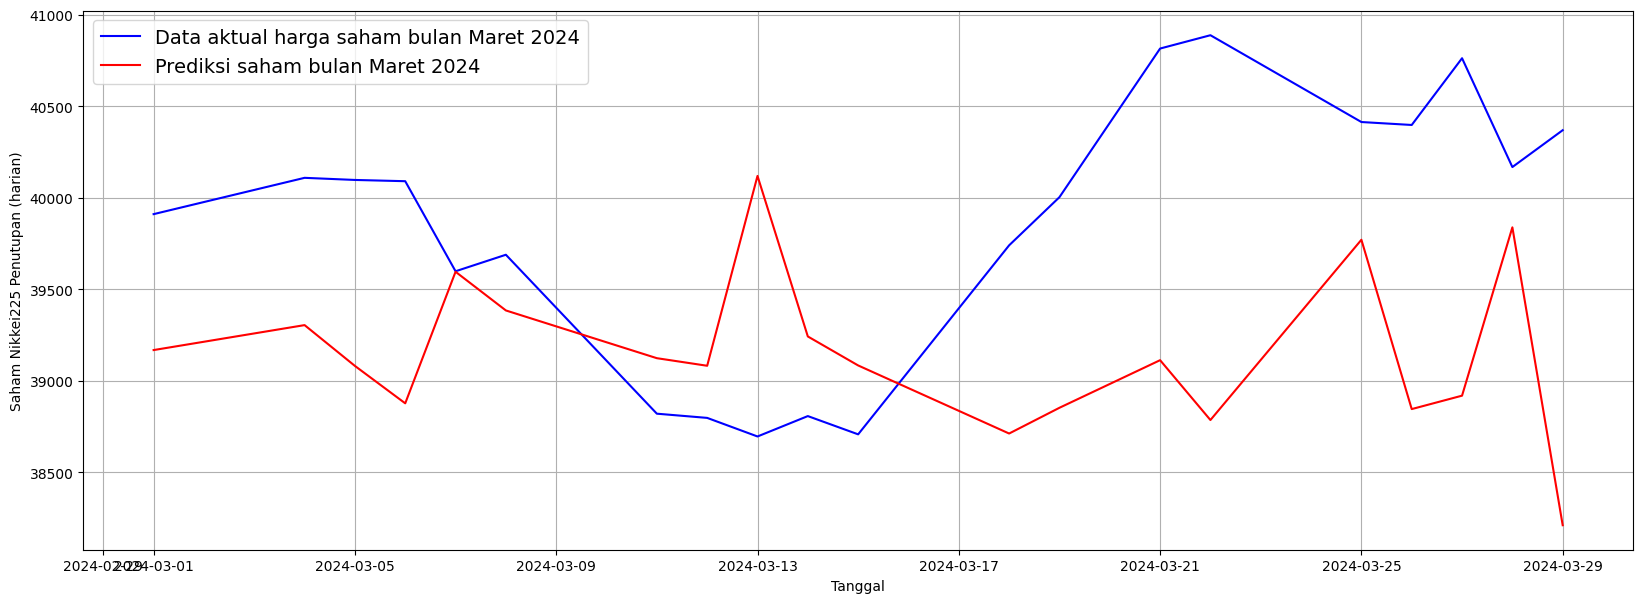

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = direct_forecasting_Maret2024_df.index.tolist(), values = direct_forecasting_Maret2024_df['Closing Price (Yen) (Nilai aktual)'].tolist(), format = "-", label = "Data aktual harga saham bulan Maret 2024", color = 'b')
plot_time_series(timesteps = direct_forecasting_Maret2024_df.index.tolist(), values = direct_forecasting_Maret2024_df['Closing Price (Yen) (Nilai Prediksi)'].tolist(), format = "-", label = "Prediksi saham bulan Maret 2024", color = 'r')

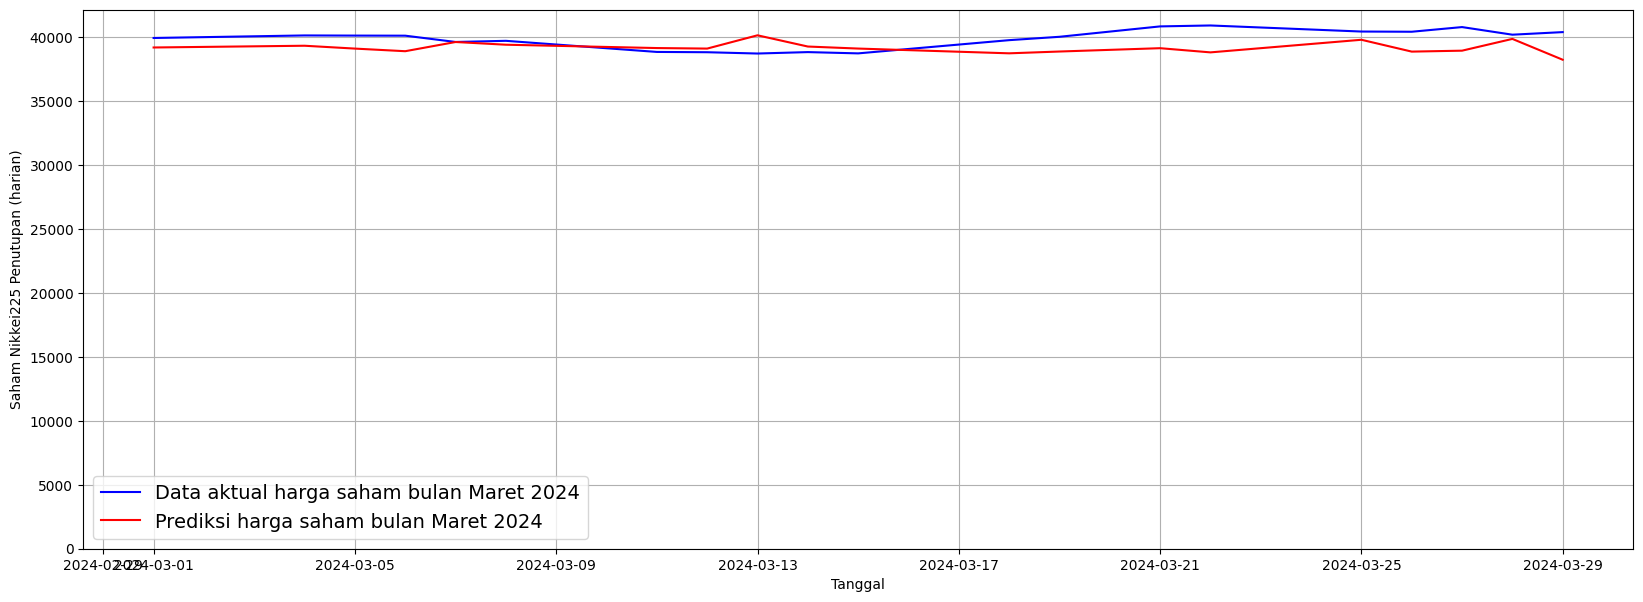

In [ ]:
plt.figure(figsize = (20,7))
plot_DirRec_direct_result(timesteps = direct_forecasting_Maret2024_df.index.tolist(), values = direct_forecasting_Maret2024_df['Closing Price (Yen) (Nilai aktual)'].tolist(), format = "-", label = "Data aktual harga saham bulan Maret 2024", color = 'b')
plot_DirRec_direct_result(timesteps = direct_forecasting_Maret2024_df.index.tolist(), values = direct_forecasting_Maret2024_df['Closing Price (Yen) (Nilai Prediksi)'].tolist(), format = "-", label = "Prediksi harga saham bulan Maret 2024", color = 'r')

# Menghitung nilai evaluasi metrik hanya selama bulan Maret 2024

evaluasi hasil prediksi DirRec forecasting bulan Maret 2024


In [ ]:

DirRec_Forecasting_result = evaluate_preds(y_true = DirRec_forecasting_Maret2024_df["Closing Price (Yen) (Nilai aktual)"].to_numpy(),
                                 y_pred = DirRec_forecasting_Maret2024_df["Closing Price (Yen) (Nilai Prediksi)"].to_numpy())

DirRec_Forecasting_result

{'mae': 1298.7809,
 'mse': 2261285.0,
 'rmse': 1503.757,
 'mape': 3.2318144,
 'R-square': -3.5049315933649634}

evaluasi hasil prediksi DirRec forecasting bulan Maret 2024


In [ ]:

directForecasting_result = evaluate_preds(y_true = direct_forecasting_Maret2024_df["Closing Price (Yen) (Nilai aktual)"].to_numpy(),
                                 y_pred = direct_forecasting_Maret2024_df["Closing Price (Yen) (Nilai Prediksi)"].to_numpy())

directForecasting_result

{'mae': 970.96936,
 'mse': 1351035.6,
 'rmse': 1162.3406,
 'mape': 2.4196732,
 'R-square': -1.691533014877062}